## CSCI-5800 |  BMS Lab04 - OCV Curve 🧪
<h5>Done by Sundeep Dayalan (02-07-2024)</h5>

> **See Also**: To refer full code, visit [GitHub Code](https://github.com/Sundeep-D/Battery-management-System-Labs).

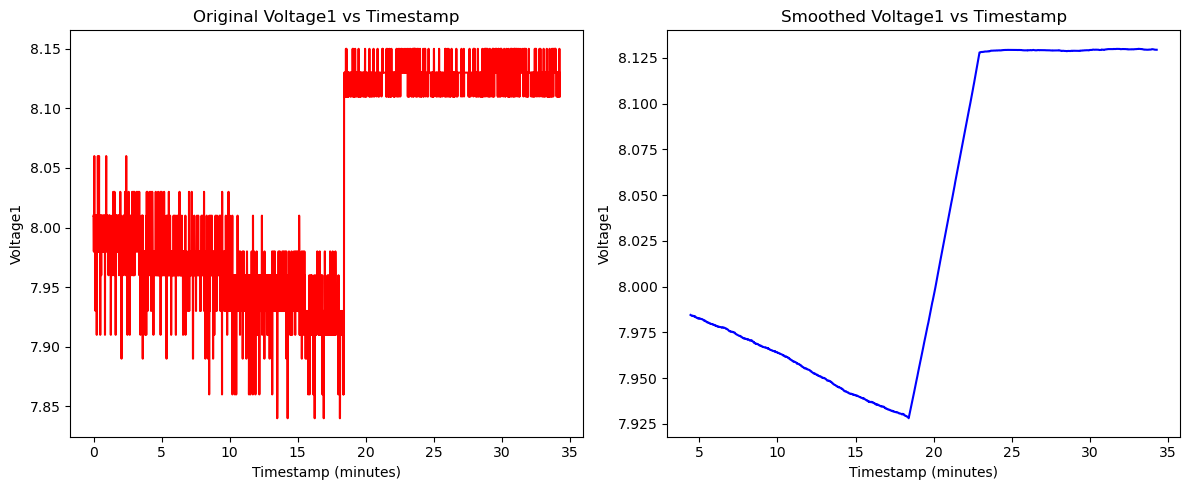

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file into a DataFrame
df = pd.read_csv('OCV-LOG.csv')

# Convert the Timestamp column from milliseconds to minutes
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ms')
df['Timestamp'] = (df['Timestamp'] - df['Timestamp'].min()).dt.total_seconds() / 60

# Apply a rolling mean to smooth the 'Voltage1' data
window_size = 500  # Increase the window size for more smoothing
df['Voltage1_smoothed'] = df['Voltage1'].rolling(window=window_size).mean()

# Plot the original data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(df['Timestamp'], df['Voltage1'], label='Original Voltage1', color='red')
plt.xlabel('Timestamp (minutes)')
plt.ylabel('Voltage1')
plt.title('Original Voltage1 vs Timestamp')

# Plot the smoothed data
plt.subplot(1, 2, 2)
plt.plot(df['Timestamp'], df['Voltage1_smoothed'], label='Smoothed Voltage1', color='blue')
plt.xlabel('Timestamp (minutes)')
plt.ylabel('Voltage1')
plt.title('Smoothed Voltage1 vs Timestamp')

plt.tight_layout()
plt.show()


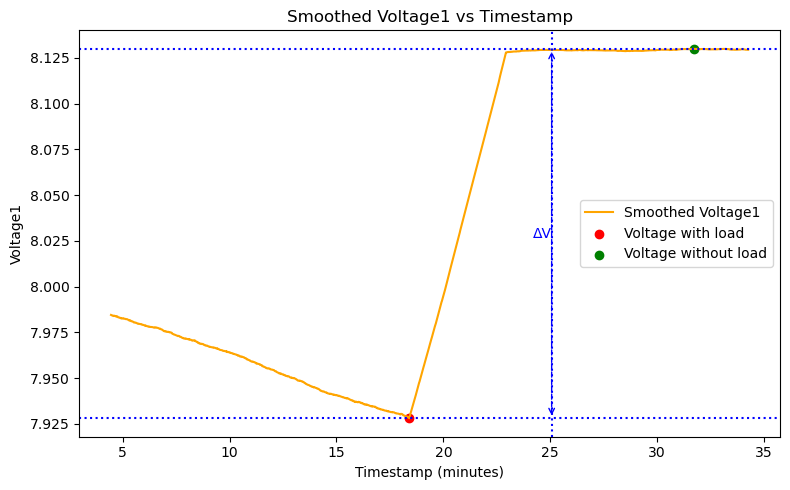

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file into a DataFrame
df = pd.read_csv('OCV-LOG.csv')

# Convert the Timestamp column from milliseconds to minutes
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ms')
df['Timestamp'] = (df['Timestamp'] - df['Timestamp'].min()).dt.total_seconds() / 60

# Apply a rolling mean to smooth the 'Voltage1' data
df['Voltage1_smoothed'] = df['Voltage1'].rolling(window=window_size).mean()

# Print minimum and maximum values of Voltage1 from smoothed data
min_voltage_smoothed = df['Voltage1_smoothed'].min()
max_voltage_smoothed = df['Voltage1_smoothed'].max()

# Plot the smoothed graph
plt.figure(figsize=(8, 5))

# Smoothed Voltage1 graph
plt.plot(df['Timestamp'], df['Voltage1_smoothed'], label=f'Smoothed Voltage1', color='orange')
plt.xlabel('Timestamp (minutes)')
plt.ylabel('Voltage1')
plt.title(f'Smoothed Voltage1 vs Timestamp')
plt.scatter(df['Timestamp'][df['Voltage1_smoothed'].idxmin()], min_voltage_smoothed, color='red', label='Voltage with load')
plt.scatter(df['Timestamp'][df['Voltage1_smoothed'].idxmax()], max_voltage_smoothed, color='green', label='Voltage without load')

# Draw dotted lines
min_x = df['Timestamp'][df['Voltage1_smoothed'].idxmin()]
min_y = min_voltage_smoothed
max_x = df['Timestamp'][df['Voltage1_smoothed'].idxmax()]
max_y = max_voltage_smoothed

# Calculate the midpoint_x
midpoint_x = (min_x + max_x) / 2

# Draw dotted lines and annotate
plt.axhline(y=min_y, linestyle='dotted', color='blue')
plt.axhline(y=max_y, linestyle='dotted', color='blue')
plt.axvline(x=midpoint_x, linestyle='dotted', color='blue')

# Draw a vertical line connecting the upper and lower points with an arrow
plt.annotate('', xy=(midpoint_x, max_y), xytext=(midpoint_x, min_y),
             arrowprops=dict(arrowstyle='<->', linestyle='dashed', color='blue'))

# Add text label for the vertical line
plt.annotate('ΔV', xy=(midpoint_x, (max_y + min_y) / 2), color='blue', ha='right', va='center')

plt.legend()
plt.tight_layout()
plt.show()


# Calculate Voltage Drop ∆V


> **Formula**: ΔV=V_initial − V_final


<h2>Voltage with load: 7.93V</h2>

<h2>Voltage without load: 8.13V</h2>

<h2>Voltage Drop: 0.20V</h2>

<h2>Average Current: 27.78 mA</h2>

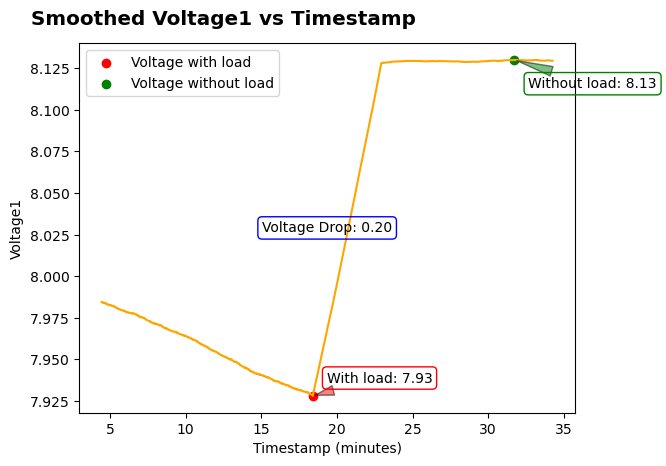

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import Markdown, display

def printmd(string, size=2):
    display(Markdown(f'<h{size}>{string}</h{size}>'))

# Load CSV file into a DataFrame
df = pd.read_csv('OCV-LOG.csv')

# Convert the Timestamp column from milliseconds to minutes
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ms')
df['Timestamp'] = (df['Timestamp'] - df['Timestamp'].min()).dt.total_seconds() / 60

# Apply a rolling mean to smooth the 'Voltage1' data
df['Voltage1_smoothed'] = df['Voltage1'].rolling(window=window_size).mean()

# Print minimum and maximum values of Voltage1 from smoothed data
min_voltage_smoothed = df['Voltage1_smoothed'].min()
max_voltage_smoothed = df['Voltage1_smoothed'].max()
printmd(f'Voltage with load: {min_voltage_smoothed:.2f}V')
printmd(f'Voltage without load: {max_voltage_smoothed:.2f}V')

# Plot the smoothed graph
plt.plot(df['Timestamp'], df['Voltage1_smoothed'], color='orange')
plt.xlabel('Timestamp (minutes)')
plt.ylabel('Voltage1')

# Set the title for the entire figure (top-left corner)
plt.suptitle(f'Smoothed Voltage1 vs Timestamp', x=0.05, y=0.95, ha='left', fontsize='x-large', fontweight='bold')

# Highlight minimum and maximum values on the plot with annotations
plt.scatter(df['Timestamp'][df['Voltage1_smoothed'].idxmin()], min_voltage_smoothed, color='red', label='Voltage with load')
plt.scatter(df['Timestamp'][df['Voltage1_smoothed'].idxmax()], max_voltage_smoothed, color='green', label='Voltage without load')
plt.annotate(f'With load: {min_voltage_smoothed:.2f}', 
             xy=(df['Timestamp'][df['Voltage1_smoothed'].idxmin()], min_voltage_smoothed),
             xytext=(10, 10),
             textcoords='offset points',
             arrowprops=dict(facecolor='red', arrowstyle='wedge,tail_width=0.7', alpha=0.5),
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='red', facecolor='none'))

plt.annotate(f'Without load: {max_voltage_smoothed:.2f}', 
             xy=(df['Timestamp'][df['Voltage1_smoothed'].idxmax()], max_voltage_smoothed),
             xytext=(10, -20),
             textcoords='offset points',
             arrowprops=dict(facecolor='green', arrowstyle='wedge,tail_width=0.7', alpha=0.5),
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='green', facecolor='none'))

# Calculate voltage drop from smoothed data
voltage_drop = abs( min_voltage_smoothed - max_voltage_smoothed)

# Highlight voltage drop on the plot
plt.annotate(f'Voltage Drop: {voltage_drop:.2f}', xy=(0.5, 0.5), xycoords='axes fraction',
             ha='center', va='center', bbox=dict(boxstyle='round,pad=0.3', edgecolor='blue', facecolor='none'))

voltage_drop = round(voltage_drop, 2)
# Print voltage drop value
printmd(f'Voltage Drop: {voltage_drop:.2f}V')

# Calculate average current excluding zero values
current = df.loc[df['Current'] != 0, 'Current'].mean()

# Print average current value
current = round(current, 2)
printmd(f'Average Current: {current} mA')

# Show legend for the markers
plt.legend()

plt.show()


# Calculate Internal Resistance


> **Formula**: 𝑅=∆V / I

In [19]:
# Convert average_current from mA to A
current_A = current / 1000
# printmd(f'∆V: {voltage_drop:.2f} V',1)
# Calculate resistance (R)
resistance = round((voltage_drop / current_A),2)
resistance = abs(resistance)
# Print resistance value with default text size (size=2)
printmd(f'Resistance (R): {resistance:.2f} Ω',1)

<h1>Resistance (R): 7.20 Ω</h1>








# Update Log file based on new Resistance and add new column OCV


In [20]:
import pandas as pd
from tqdm import tqdm
import time

# Read the original log file
file_path = "CCV-LOG.csv"  # Update with your file path
df = pd.read_csv(file_path)

# Convert current from mA to A
df['Current'] = df['Current'] / 1000  # Convert mA to A

# Calculate OCV using the formula
df['OCV'] = df['Voltage1'] + df['Current'] * resistance

# Create a new file with the updated log
new_file_path = "CCV-LOG-UPDATED.csv"

# Display processing animation
for _ in tqdm(range(10), desc="Processing file", unit="iteration"):
    time.sleep(0.1)  # Simulate processing time

df.to_csv(new_file_path, index=False)

print(f"\nNew log file '{new_file_path}' created with OCV column.")


Processing file: 100%|██████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  8.93iteration/s]



New log file 'CCV-LOG-UPDATED.csv' created with OCV column.


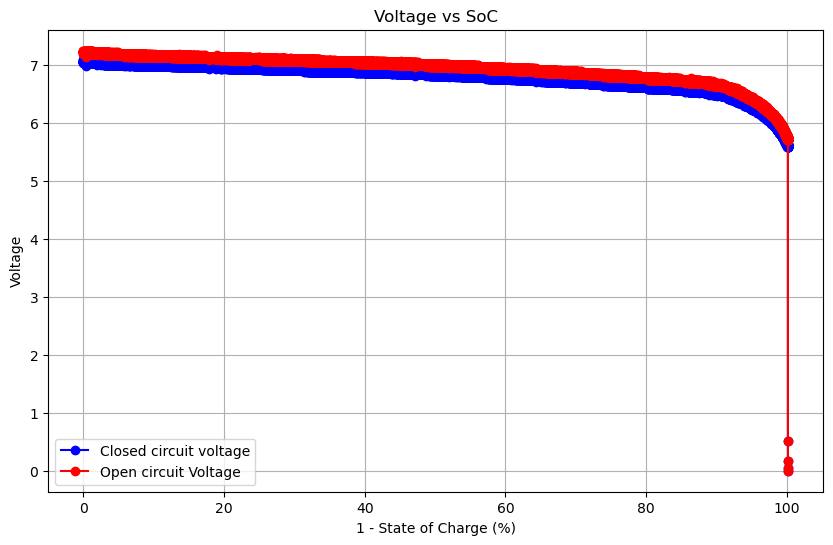

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

# Read the CSV file
df = pd.read_csv(new_file_path) 

# Calculate State of Charge (SoC)
df['SoC'] = (1 - ((271 - df['TotalCapacity']) / 271)) * 100

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['SoC'], df['Voltage1'], marker='o', linestyle='-', color='b', label='Closed circuit voltage')
plt.plot(df['SoC'], df['OCV'], marker='o', linestyle='-', color='r', label='Open circuit Voltage')  # New curve for OCV
plt.title('Voltage vs SoC')
plt.xlabel('1 - State of Charge (%)')
plt.ylabel('Voltage')
plt.legend()
plt.grid(True)
plt.show()
